In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
bin_quotes = pd.read_csv(f'datasets/bin_futures.csv.gz', compression='gzip')
bin_quotes.head()

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount
0,binance-futures,SOLUSDT,1696118401112000,1696118402028406,236,21.348,21.347,297
1,binance-futures,SOLUSDT,1696118404766000,1696118404781963,326,21.348,21.347,302
2,binance-futures,SOLUSDT,1696118404818000,1696118404830362,745,21.350,21.349,392
3,binance-futures,SOLUSDT,1696118404874000,1696118404883467,712,21.350,21.349,392
4,binance-futures,SOLUSDT,1696118404928000,1696118404942140,526,21.350,21.349,343


In [23]:
hl_quotes = pd.read_csv('datasets/parsed.csv')
hl_quotes.head()

,exchange,symbol,timestamp,ask_amount,ask_price,bid_price,bid_amount
0,hyperliquid,SOL,1696118401488817,538.84,21.520,21.505,544.42
1,hyperliquid,SOL,1696118401884510,513.03,21.517,21.502,527.53
2,hyperliquid,SOL,1696118402646417,4961.30,21.503,21.482,537.46
3,hyperliquid,SOL,1696118403599707,236.09,21.497,21.482,537.46
4,hyperliquid,SOL,1696118403751326,236.09,21.497,21.482,537.46


In [26]:
b = bin_quotes.copy()
h = hl_quotes.copy()

In [31]:
h.dtypes

exchange       object
symbol         object
timestamp       int64
ask_amount    float64
ask_price     float64
bid_price     float64
bid_amount    float64
dtype: object

In [40]:
h_pointer = 0
b_pointer = 0
result_list = []

# Iterate through each row in the hyperliquid dataframe
while h_pointer < len(h):
    h_row = h.iloc[h_pointer]
    h_timestamp = h_row['timestamp']

    # Advance the binance pointer until its timestamp exceeds hyperliquid's
    while b_pointer < len(b) and b.iloc[b_pointer]['timestamp'] <= h_timestamp:
        b_pointer += 1

    # Move one row back to get the last binance record whose timestamp is less than or equal to hyperliquid's
    b_pointer -= 1
    if b_pointer >= 0:
        b_row = b.iloc[b_pointer]
        b_timestamp = b_row['timestamp']

        # Your calculations here
        bid_bid_diff = h_row['bid_price'] - b_row['bid_price']
        ask_ask_diff = h_row['ask_price'] - b_row['ask_price']
        binance_spread = b_row['ask_price'] - b_row['bid_price']
        hyperliquid_spread = h_row['ask_price'] - h_row['bid_price']
        offset = (bid_bid_diff + ask_ask_diff) / 2.0

        # Append to result list
        result_list.append({
            'timestamp': h_timestamp,
            'bid-bid diff': bid_bid_diff,
            'ask-ask diff': ask_ask_diff,
            'binance_spread': binance_spread,
            'hyperliquid_spread': hyperliquid_spread,
            'offset': offset,
            'h_bid': h_row['bid_price'],
            'h_bid_amt': h_row['bid_amount'],
            'b_bid': b_row['bid_price'],
            'b_bid_amt': b_row['bid_amount'],
            'h_ask': h_row['ask_price'],
            'h_ask_amt': h_row['ask_amount'],
            'b_ask': b_row['ask_price'],
            'b_ask_amt': b_row['ask_amount']
        })

    # Move to the next row in hyperliquid dataframe
    h_pointer += 1


In [41]:
b_pointer

726667

In [42]:
h_pointer

132464

In [43]:
result_df = pd.DataFrame(result_list)
result_df

,timestamp,bid-bid diff,ask-ask diff,binance_spread,hyperliquid_spread,offset,h_bid,h_bid_amt,b_bid,b_bid_amt,h_ask,h_ask_amt,b_ask,b_ask_amt
0,1696118401488817,0.158,0.172,0.001,0.015,0.1650,21.505,544.42,21.347,297,21.520,538.84,21.348,236
1,1696118401884510,0.155,0.169,0.001,0.015,0.1620,21.502,527.53,21.347,297,21.517,513.03,21.348,236
2,1696118402646417,0.135,0.155,0.001,0.021,0.1450,21.482,537.46,21.347,297,21.503,4961.30,21.348,236
3,1696118403599707,0.135,0.149,0.001,0.015,0.1420,21.482,537.46,21.347,297,21.497,236.09,21.348,236
4,1696118403751326,0.135,0.149,0.001,0.015,0.1420,21.482,537.46,21.347,297,21.497,236.09,21.348,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132459,1696204796194696,-1.235,-1.224,0.001,0.012,-1.2295,22.640,442.79,23.875,247,22.652,242.19,23.876,122
132460,1696204796984238,-1.237,-1.225,0.001,0.013,-1.2310,22.640,442.79,23.877,107,22.653,244.27,23.878,241
132461,1696204797643861,-1.232,-1.220,0.001,0.013,-1.2260,22.640,442.79,23.872,86,22.653,244.27,23.873,250
132462,1696204798225312,-1.232,-1.220,0.001,0.013,-1.2260,22.640,442.79,23.872,8,22.653,244.27,23.873,260


In [64]:
result_df['ewma_offset'] = result_df['offset'].ewm(span=1, adjust=False).mean()


In [65]:
result_df.tail()

,timestamp,bid-bid diff,ask-ask diff,binance_spread,hyperliquid_spread,offset,h_bid,h_bid_amt,b_bid,b_bid_amt,h_ask,h_ask_amt,b_ask,b_ask_amt,ewma_offset
132459,1696204796194696,-1.235,-1.224,0.001,0.012,-1.2295,22.640,442.79,23.875,247,22.652,242.19,23.876,122,-1.2295
132460,1696204796984238,-1.237,-1.225,0.001,0.013,-1.2310,22.640,442.79,23.877,107,22.653,244.27,23.878,241,-1.2310
132461,1696204797643861,-1.232,-1.220,0.001,0.013,-1.2260,22.640,442.79,23.872,86,22.653,244.27,23.873,250,-1.2260
132462,1696204798225312,-1.232,-1.220,0.001,0.013,-1.2260,22.640,442.79,23.872,8,22.653,244.27,23.873,260,-1.2260
132463,1696204798806521,-1.230,-1.219,0.001,0.012,-1.2245,22.643,446.34,23.873,197,22.655,236.25,23.874,138,-1.2245


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


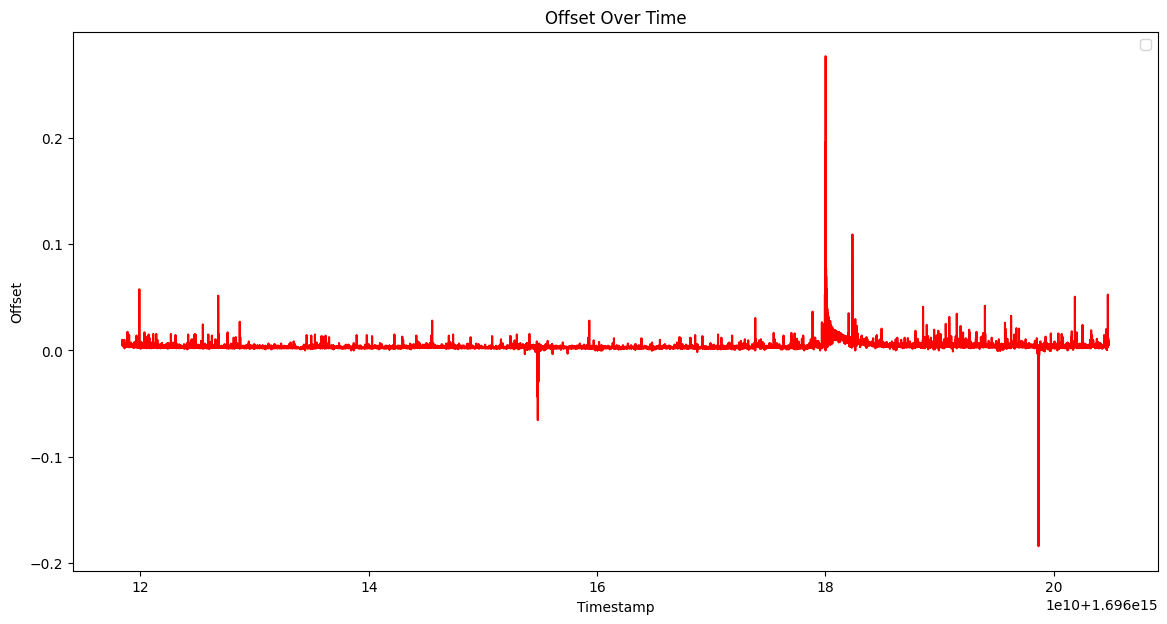

In [66]:


# Assuming result_df is your DataFrame with the calculated offsets and timestamps

# Random Sampling: Sample 1000 random points
# sampled_df = result_df.sample(n=100000)

# OR

# Systematic Sampling: Take every 100th row
# sampled_df = result_df.iloc[::100, :]

# Sort by timestamp if needed (especially if you did random sampling)
# sampled_df = sampled_df.sort_values(by='timestamp')
# sampled_df = result_df

plt.figure(figsize=(14, 7))

# plt.plot(sampled_df['timestamp'], sampled_df['offset'], label='Offset', linewidth=1)
# plt.plot(result_df['timestamp'], result_df['hyperliquid_spread'] - result_df['binance_spread'], color="blue")
# plt.plot(result_df['timestamp'], result_df['hyperliquid_spread'], color="red")

x = result_df['offset']
x_1 = result_df['ewma_offset']
bin_bid_offset = result_df['b_bid'] + x_1
bin_ask_offset = result_df['b_ask'] + x_1
hl_bid = result_df['h_bid']
hl_ask = result_df['h_ask']

# plt.plot(result_df['timestamp'], x, color='blue')
plt.plot(result_df['timestamp'], hl_ask - bin_ask_offset, color='red')

plt.title('Offset Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Offset')
plt.legend()

plt.show()


In [54]:
# result_df[result_df['offset']<-3]
thing = 'ewma_offset'
result_df[result_df['offset'] - result_df['ewma_offset']>0.1]

,timestamp,bid-bid diff,ask-ask diff,binance_spread,hyperliquid_spread,offset,h_bid,h_bid_amt,b_bid,b_bid_amt,h_ask,h_ask_amt,b_ask,b_ask_amt,ewma_offset
55907,1696154812390531,-2.666,-2.704,0.044,0.006,-2.6850,21.183,515.81,23.849,125,21.189,523.75,23.893,499,-2.794931
55908,1696154813041490,-2.525,-2.548,0.029,0.006,-2.5365,21.183,515.81,23.708,50,21.189,523.75,23.737,95,-2.665716
55909,1696154813644504,-2.413,-2.410,0.003,0.006,-2.4115,21.183,515.81,23.596,11,21.189,523.75,23.599,84,-2.538608
55910,1696154814408345,-2.249,-2.291,0.048,0.006,-2.2700,21.183,515.81,23.432,36,21.189,523.75,23.480,3,-2.404304
55911,1696154815005831,-2.114,-2.201,0.093,0.006,-2.1575,21.183,515.81,23.297,35,21.189,523.75,23.390,110,-2.280902
55912,1696154815806942,-1.947,-1.976,0.035,0.006,-1.9615,21.183,515.81,23.130,31,21.189,523.75,23.165,818,-2.121201
55978,1696154858621797,-1.648,-1.707,0.066,0.007,-1.6775,21.170,559.75,22.818,2487,21.177,571.32,22.884,192,-1.827546
94579,1696180002502993,0.554,0.946,0.001,0.393,0.7500,23.193,720.75,22.639,585,23.586,42.35,22.640,1061,0.630624
94580,1696180003078299,0.935,0.946,0.001,0.012,0.9405,23.574,76.81,22.639,591,23.586,42.35,22.640,1089,0.785562
